In [1]:
!pip3 install imblearn

     |████████████████████████████████| 163 kB 472 kB/s eta 0:00:01
     |████████████████████████████████| 7.2 MB 5.1 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.21.2
    Uninstalling scikit-learn-0.21.2:
      Successfully uninstalled scikit-learn-0.21.2


In [7]:
# !pip install imblearn

# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [8]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np


# calculate accuracy measures and confusion matrix
from sklearn import metrics


from sklearn.metrics import recall_score

from imblearn.over_sampling import SMOTE

In [25]:
# Since it is a data file with no header, we will supply the column names which have been obtained from the above URL 
# Create a python list of column names called "names"

colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

#Load the file from local directory using pd.read_csv which is a special form of read_table
#while reading the data, supply the "colnames" list

pima_df = pd.read_csv("pima-indians-diabetes.csv", names= colnames)
pima_df.drop([0], inplace=True)

In [26]:
pima_df.head(50)

,preg,plas,pres,skin,test,mass,pedi,age,class
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0
7,3,78,50,32,88,31,0.248,26,1
8,10,115,0,0,0,35.3,0.134,29,0
9,2,197,70,45,543,30.5,0.158,53,1
10,8,125,96,0,0,0,0.232,54,1


In [27]:
# Let us check whether any of the columns has any value other than numeric i.e. data is not corrupted such as a "?" instead of 
# a number.

# we use np.isreal a numpy function which checks each column for each row and returns a bool array, 
# where True if input element is real.
# applymap is pandas dataframe function that applies the np.isreal function columnwise
# Following line selects those rows which have some non-numeric value in any of the columns hence the  ~ symbol

pima_df[~pima_df.applymap(np.isreal).all(1)]

,preg,plas,pres,skin,test,mass,pedi,age,class
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.34,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1


In [28]:
# replace the missing values in pima_df with median value :Note, we do not need to specify the column names
# every column's missing value is replaced with that column's median respectively
#pima_df = pima_df.fillna(pima_df.median())
#pima_df

In [29]:
#Lets analysze the distribution of the various attributes
pima_df.describe().transpose()

,count,unique,top,freq
preg,768,17,1,135
plas,768,136,99,17
pres,768,47,70,57
skin,768,51,0,227
test,768,186,0,374
mass,768,248,32,13
pedi,768,517,0.254,6
age,768,52,22,72
class,768,2,0,500


In [30]:
# Let us look at the target column which is 'class' to understand how the data is distributed amongst the various values
pima_df.groupby(["class"]).count()

# Most are not diabetic. The ratio is almost 1:2 in favor or class 0.  The model's ability to predict class 0 will 
# be better than predicting class 1. 

,preg,plas,pres,skin,test,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


In [31]:
# Let us do a correlation analysis among the different dimensions and also each dimension with the dependent dimension
# This is done using scatter matrix function which creates a dashboard reflecting useful information about the dimensions
# The result can be stored as a .png file and opened in say, paint to get a larger view 

#pima_df_attr = pima_df.iloc[:,0:9]

#axes = pd.plotting.scatter_matrix(pima_df_attr)
#plt.tight_layout()
#plt.savefig('d:\greatlakes\pima_pairpanel.png')

LinAlgError: singular matrix

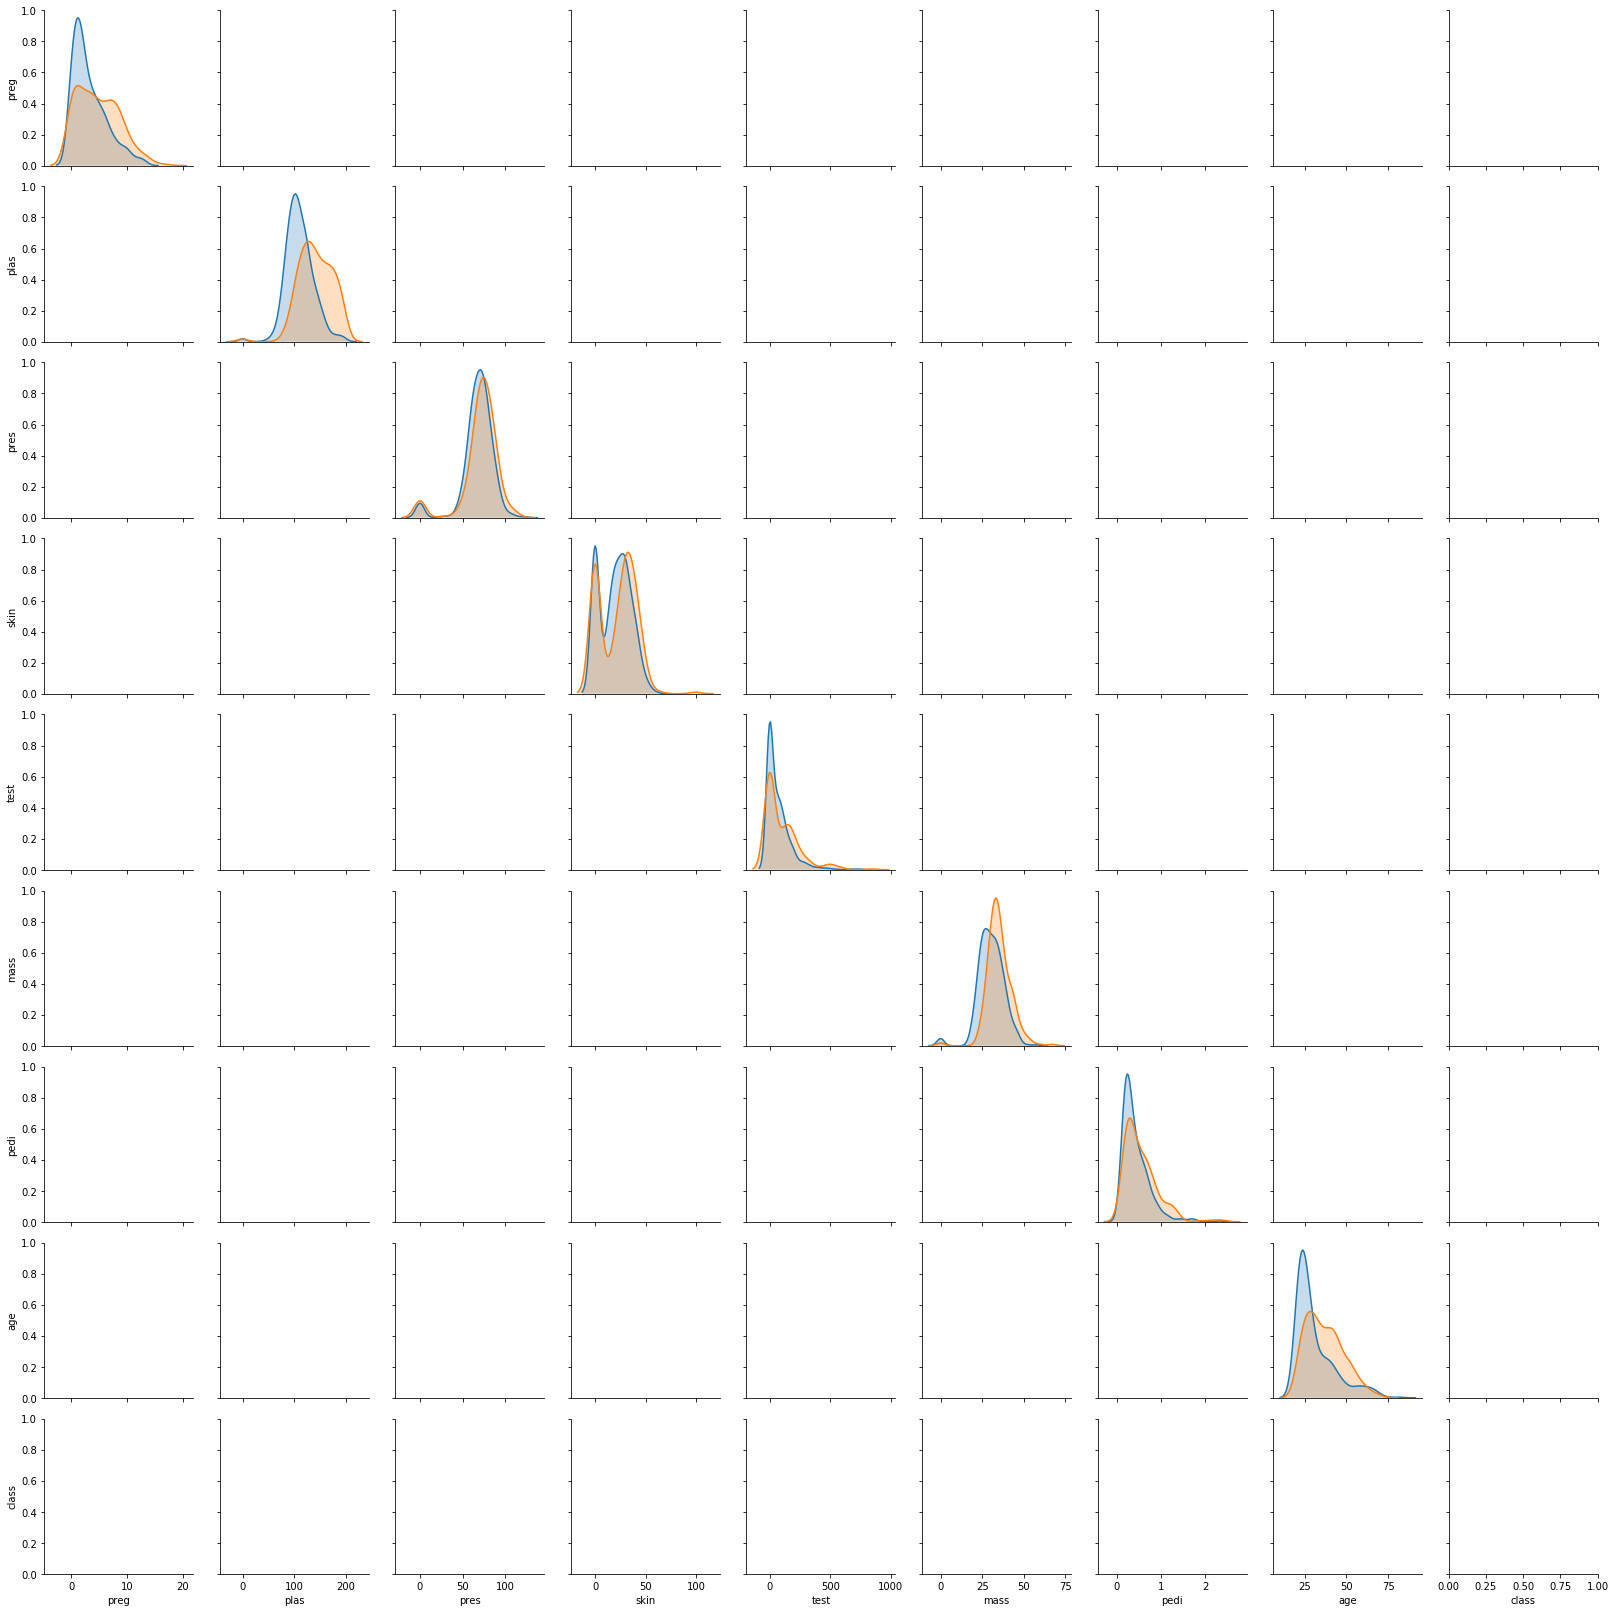

In [32]:
# Pairplot using sns

sns.pairplot(pima_df , hue='class' , diag_kind = 'kde')

In [33]:
#data for all the attributes are skewed, especially for the variable "test"

#The mean for test is 80(rounded) while the median is 30.5 which clearly indicates an extreme long tail on the right


In [34]:
# Attributes which look normally distributed (plas, pres, skin, and mass).
# Some of the attributes look like they may have an exponential distribution (preg, test, pedi, age).
# Age should probably have a normal distribution, the constraints on the data collection may have skewed the distribution.

# There is no obvious relationship between age and onset of diabetes.
# There is no obvious relationship between pedi function and onset of diabetes.


In [35]:
array = pima_df.values
X = array[:,0:7] # select all rows and first 8 columns which are the attributes
Y = array[:,8]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)

numpy.ndarray

# SMOTE to upsample smaller class

In [36]:
print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())


print("After UpSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_res==0)))



print('After UpSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_res.shape))








Before UpSampling, counts of label '1': 0
Before UpSampling, counts of label '0': 0 

After UpSampling, counts of label '1': 0
After UpSampling, counts of label '0': 0 

After UpSampling, the shape of train_X: (706, 7)
After UpSampling, the shape of train_y: (706,) 



In [37]:
# Fit the model on original data i.e. before upsampling
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)

0.7619047619047619


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [38]:
test_pred = model.predict(X_test)

print(metrics.classification_report(y_test, test_pred))
print(metrics.confusion_matrix(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       147
           1       0.74      0.54      0.62        84

    accuracy                           0.76       231
   macro avg       0.75      0.71      0.72       231
weighted avg       0.76      0.76      0.75       231

[[131  16]
 [ 39  45]]


# UpSample smaller class

In [39]:
# fit model on upsampled data 

model.fit(X_train_res, y_train_res)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.7575757575757576
[[110  37]
 [ 19  65]]
              precision    recall  f1-score   support

           0       0.85      0.75      0.80       147
           1       0.64      0.77      0.70        84

    accuracy                           0.76       231
   macro avg       0.74      0.76      0.75       231
weighted avg       0.77      0.76      0.76       231



/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Down Sampling the larger class

In [25]:
non_diab_indices = pima_df[pima_df['class'] == 0].index   # Get the record numbers of non-diab cases
no_diab = len(pima_df[pima_df['class'] == 0])             # how many non-diab cases
print(no_diab)

diab_indices = pima_df[pima_df['class'] == 1].index       # record number of the diabeteics cases
diab = len(pima_df[pima_df['class'] == 1])                # how many diabetic cases
print(diab)


500
268


In [26]:
random_indices = np.random.choice( non_diab_indices, no_diab - 200 , replace=False)    #Randomly pick up 200 non-diab indices

In [27]:
down_sample_indices = np.concatenate([diab_indices,random_indices])  # combine the 200 non-diab indices with diab indices

In [28]:
pima_df_down_sample = pima_df.loc[down_sample_indices]  # Extract all those records for diab and non-diab to create new set
pima_df_down_sample.shape
pima_df_down_sample.groupby(["class"]).count()  # look at the class distribution after downsample

,preg,plas,pres,skin,test,mass,pedi,age
class,,,,,,,,
0,300,300,300,300,300,300,300,300
1,268,268,268,268,268,268,268,268


In [29]:
array = pima_df_down_sample.values
X = array[:,0:7] # select all rows and first 8 columns which are the attributes
Y = array[:,8]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)

numpy.ndarray

In [30]:
print('After DownSampling, the shape of X_train: {}'.format(X_train.shape))
print('After DownSampling, the shape of X_test: {} \n'.format(X_test.shape))


After DownSampling, the shape of X_train: (397, 7)
After DownSampling, the shape of X_test: (171, 7) 



In [31]:
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.7076023391812866
[[70 28]
 [22 51]]
              precision    recall  f1-score   support

         0.0       0.76      0.71      0.74        98
         1.0       0.65      0.70      0.67        73

   micro avg       0.71      0.71      0.71       171
   macro avg       0.70      0.71      0.70       171
weighted avg       0.71      0.71      0.71       171



C:\Users\Mukesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## IMBLearn Random Under Sampling

In [24]:
from imblearn.under_sampling import RandomUnderSampler

In [25]:
rus = RandomUnderSampler(return_indices=True)

In [27]:
X_rus, y_rus, id_rus = rus.fit_sample(X_train, y_train)

In [36]:
y_rus


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [37]:
y_rus.shape

(368,)

## IMBLearn Random Over Sampling

In [33]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()

X_ros, y_ros = ros.fit_sample(X_train, y_train)

In [34]:
y_ros

array([1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 0.

In [35]:
y_ros.shape

(706,)

In [45]:
X_ros.shape

(706, 7)

##  Deleting nearest majority neighbors  TomekLinks



In [40]:
from imblearn.under_sampling import TomekLinks


In [41]:
tl = TomekLinks(return_indices=True, ratio='majority')

In [42]:
X_tl, y_tl, id_tl = tl.fit_sample(X_train, y_train)   # id_tl is removed instances of majority class

In [43]:
y_tl.shape

(497,)

In [44]:
X_tl.shape

(497, 7)

## Upsampling followed by downsampling

In [60]:
from imblearn.combine import SMOTETomek

In [61]:
smt = SMOTETomek(ratio='auto')

In [62]:
X_smt, y_smt = smt.fit_sample(X_train, y_train)

In [64]:
X_smt.shape

(664, 7)

## Cluster based undersampling

In [65]:
from imblearn.under_sampling import ClusterCentroids

In [84]:
cc = ClusterCentroids()  
X_cc, y_cc = cc.fit_sample(X_train, y_train)


In [85]:
X_cc.shape

(368, 7)

In [86]:
y_cc

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.